In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
resolution = pd.read_csv('/home/osboxes/fiuba-trocafone-tp1-final-set/events.csv')

/home/osboxes/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
#Chequeo de nulos
resolution['screen_resolution'].isnull().value_counts()

True     923910
False     87378
Name: screen_resolution, dtype: int64

+ Existe una gran cantidad de nulos ('NaN') esto se debe a que la cantidad en False corresponde solo con el evento: 'visited site'

In [26]:
# Cual es la variedad de screen resolutions disponibles en el archivo?
resolution['screen_resolution'].value_counts()

360x640      30009
1366x768     21379
320x534       3622
1920x1080     3521
320x570       2561
1360x768      2476
1600x900      2435
1024x768      2362
1440x900      2210
1280x1024     1914
320x568       1780
1280x720      1139
1280x800      1102
1536x864      1057
412x732        934
375x667        931
424x753        744
320x480        600
320x569        551
600x1024       432
1680x1050      373
1280x768       343
1024x600       317
768x1024       316
414x736        231
640x360        227
480x800        215
1093x615       208
360x740        203
320x427        163
             ...  
1179x662         1
534x854          1
342x442          1
1368x768         1
722x406          1
971x549          1
364x647          1
820x480          1
290x327          1
1843x1037        1
1252x783         1
2160x1080        1
487x866          1
721x1281         1
855x480          1
351x623          1
240x260          1
1012x569         1
1776x1000        1
1422x1138        1
976x549          1
322x536     

+ Hay una cantidad enorme de accesos al site desde un dispositivo de resolucion 360*640
+ La resolucion de Pc preferida es de: 1366x768  

In [4]:
#vistazo de las primeras columnas
resolution.columns

Index(['timestamp', 'event', 'person', 'url', 'sku', 'model', 'condition',
       'storage', 'color', 'skus', 'search_term', 'staticpage',
       'campaign_source', 'search_engine', 'channel', 'new_vs_returning',
       'city', 'region', 'country', 'device_type', 'screen_resolution',
       'operating_system_version', 'browser_version'],
      dtype='object')

In [6]:
resolution['screen_resolution']

1            360x640
5            360x640
9          1920x1080
16         1920x1080
45          1366x768
87          1366x768
96           360x640
106         1366x768
108         1366x768
112          320x570
116         1024x600
118         1024x600
127         1024x600
144         1024x600
154         1024x600
168         1024x600
175         1024x600
190         1024x600
203         1024x600
206         1024x600
210         1024x600
221         1360x768
227         1366x768
235         1280x800
244         1280x800
252         1280x800
258          320x534
261          320x534
266          320x534
268          320x534
             ...    
1010880      320x534
1010890     1366x768
1010938     1366x768
1010949    1920x1080
1010986    1280x1024
1011011     1024x768
1011018     1024x768
1011027     1024x768
1011036     1024x768
1011045     1366x768
1011049     1366x768
1011055     1366x768
1011060     1280x800
1011064     1280x800
1011127     1280x800
1011148     1280x800
1011181      

In [6]:
#Un grafico inicial
distX = resolution['screen_resolution']
distX = distX.dropna()
x = distX.value_counts()
x = pd.DataFrame(data = x)
xGraph = x.reset_index().dropna()
xGraph['screen_resLog'] = np.log(xGraph['screen_resolution'])

In [7]:
#Me quedo con los 20 mas populares
vectorIndex = np.array(resolution['screen_resolution'].value_counts().head(20).index)
xGraph = xGraph[xGraph['index'].isin(vectorIndex)]

Text(0.5,1,'Variedad de resoluciones : las 20 mas populares')

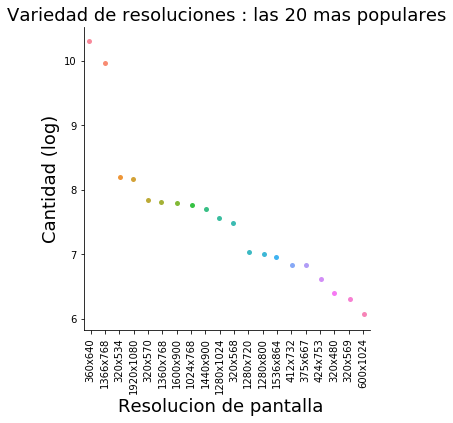

In [8]:
g = sns.catplot(x = 'index',y = 'screen_resLog', data = xGraph)
plt.xticks(rotation = 'vertical')
plt.xlabel('Resolucion de pantalla  ', fontsize = 18)
plt.ylabel('Cantidad (log)', fontsize = 18)
plt.title('Variedad de resoluciones : las 20 mas populares', fontsize = 18)

### Cual es la relacion entre visitas, checkouts y la resolucion de pantalla?

In [9]:
#Armo un dataframe con la cantidad de visitas a lo largo del semestre
vis = resolution[(resolution['event'] == 'visited site')]
vis1 = vis.groupby(['person','screen_resolution'])['event'].count()
vis2 = pd.DataFrame(data = vis1)
vis2.rename(columns = {'event':'cantidadVisitas'},inplace=True) 
vis3 = vis2.reset_index()

In [10]:
#Armo un dataframe con la cantidad de checkouts a lo largo del semestre
checks = resolution[(resolution['event'] == 'checkout') & (resolution['person'].isin(vis3['person'].values))]
checks1 = checks.groupby(['person'])['event'].count()
checks2 = pd.DataFrame(data = checks1)
checks2.rename(columns = {'event':'cantidadCheckouts'},inplace=True) 
checks3 = checks2.reset_index()


In [98]:
join = pd.merge(checks3,vis3,how = 'left',on='person')

#Ahora filtro por las resoluciones mas populares
join = join[join['screen_resolution'].isin(resolution['screen_resolution'].value_counts().head(10).index)]


Text(0.5,1,'Cantidad de checkouts vs cantidad de visitas filtrado por resoluciones mas populares')

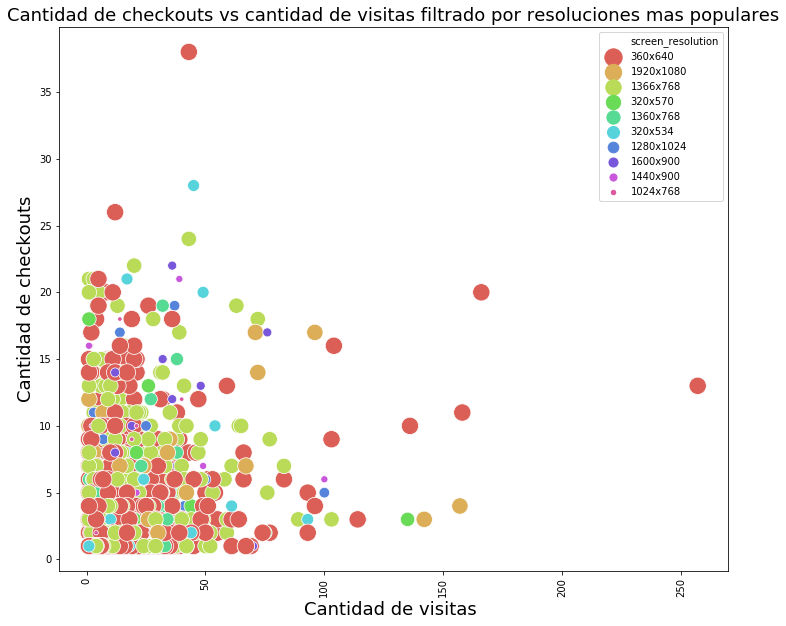

In [99]:
#Plot
plt.figure(figsize=(12,10))
sns.scatterplot(x="cantidadVisitas",y="cantidadCheckouts",hue="screen_resolution",data=join,palette = "hls",\
                size ="screen_resolution",sizes = (20,300))
plt.xticks(rotation = 'vertical')
#Seteo los titles
plt.xlabel('Cantidad de visitas ', fontsize = 18)
plt.ylabel('Cantidad de checkouts', fontsize = 18)
plt.title('Cantidad de checkouts vs cantidad de visitas filtrado por resoluciones mas populares', fontsize = 18)

+ Entre 0 y 25 visitas esta la mayor cantidad de checkouts, alrededor del 80 %.
+ Existen mayor cantidad de checkouts desde una resolucion movil, la primera en la lista.
+ La cantidad de checkouts desde la PC no suben de 25

### Cual es la relacion entre cantidad de visitas, productos vistos y las resoluciones de pantalla mas populares?

In [37]:
#Armo un dataframe con la cantidad de productos vistos a lo largo del semestre por persona
vistos = resolution[(resolution['event'] == 'viewed product')]
vistos1 = vistos.groupby(['person'])['event'].count()
vistos2 = pd.DataFrame(data = vistos1)
vistos2.rename(columns = {'event':'cantidadDeVistos'},inplace=True) 
vistos3 = vistos2.reset_index()


In [47]:
join2 = pd.merge(vistos3,vis3,how = 'left',on='person')

#Ahora filtro por las resoluciones mas populares
join2 = join2[join2['screen_resolution'].isin(np.array(resolution['screen_resolution'].value_counts().head().index))]


Text(0.5,1,'Cantidad de visitas vs cantidad de vistos filtrado por 5 resoluciones mas populares')

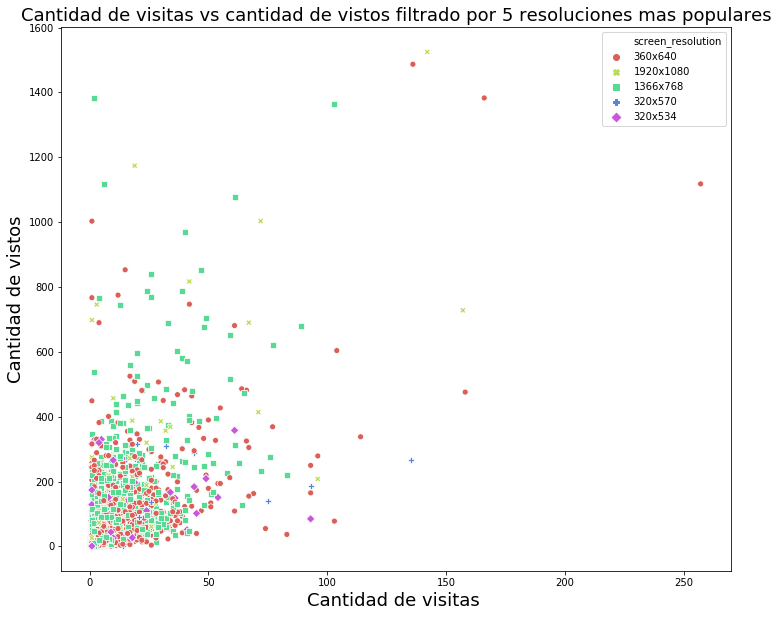

In [66]:
#Plot
plt.figure(figsize=(12,10))
sns.scatterplot(x="cantidadVisitas",y="cantidadDeVistos",hue="screen_resolution",data=join2,palette = "hls",\
                style ="screen_resolution")

#Seteo los titles
plt.xlabel('Cantidad de visitas ', fontsize = 18)
plt.ylabel('Cantidad de vistos', fontsize = 18)
plt.title('Cantidad de visitas vs cantidad de vistos filtrado por 5 resoluciones mas populares', fontsize = 18)


+ Antes de las 50 visitas se producen la mayor cantidad de vistos.
+ La mayor cantidad de vistos se producen desde la PC, la segunda resolucion en la lista.
+ La mayor cantidad de visitas se realiza desde el movil, la primera resolucion en la lista.

### Finalmente la relacion entre la cantidad de visitas al sitio, conversiones y resoluciones mas populares

In [63]:
#Armo un dataframe con la cantidad de conversiones a lo largo del semestre por persona
conv = resolution[(resolution['event'] == 'conversion')]
conv1 = conv.groupby(['person'])['event'].count()
conv2 = pd.DataFrame(data = conv1)
conv2.rename(columns = {'event':'conversiones'},inplace=True) 
conv3 = conv2.reset_index()


In [100]:
join3 = pd.merge(conv3,vis3,how = 'left',on='person')

#Ahora filtro por las resoluciones mas populares
join3 = join3[join3['screen_resolution'].isin(np.array(resolution['screen_resolution'].value_counts().head(2).index))]


Text(0.5,0.98,'Cantidad de visitas vs conversiones filtrado por 2 resoluciones mas populares')

<Figure size 864x864 with 0 Axes>

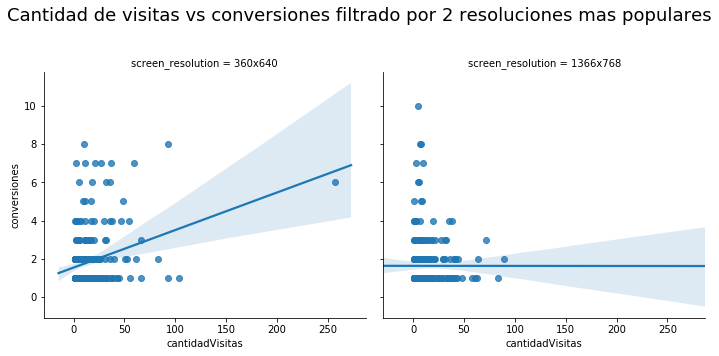

In [101]:
#Plot
plt.figure(figsize=(12,12))
g  = sns.lmplot(x="cantidadVisitas",y="conversiones",data=join3,col="screen_resolution")

#Seteo los titles
plt.subplots_adjust(top=0.8)
plt.suptitle('Cantidad de visitas vs conversiones filtrado por 2 resoluciones mas populares', fontsize = 18)


+ Desde la PC se nota un menor desvío sobre la media, aunque es bastante alto
+ En ambos casos la cantidad de outliers es alta.
+ Desde el movil se registró una cantidad de visitas mayor a 250
+ La mayor cantidad de conversiones se produce antes de las 50 visitas.